In [2]:
#importing the nessesary libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [7]:
#added the average age of the to the incomplete data 
data_train['Age'].fillna(round(data_train['Age'].mean()),inplace =True)

In [8]:
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import matplotlib.pyplot as plt

def ploting (variable):
    #getting the feature
    var = data_train[variable]
    #Frequencies
    varValue = var.value_counts()
    #visualization
    plt.figure(figsize =(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))
    
    
    

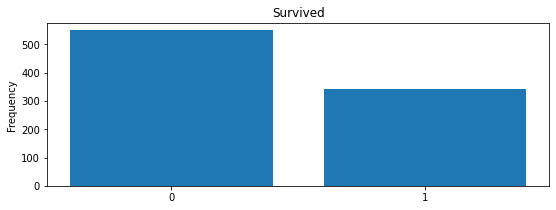

Survived:
0    549
1    342
Name: Survived, dtype: int64


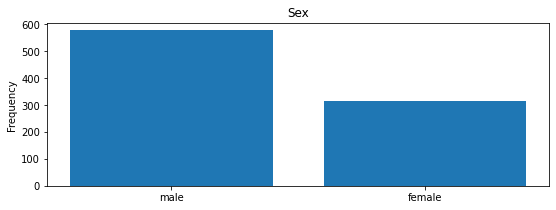

Sex:
male      577
female    314
Name: Sex, dtype: int64


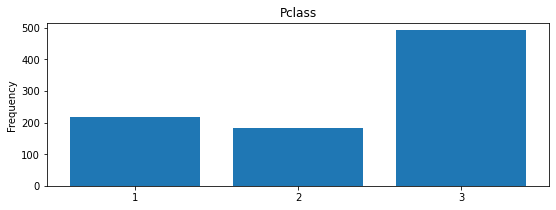

Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


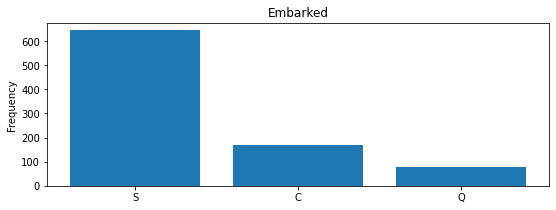

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


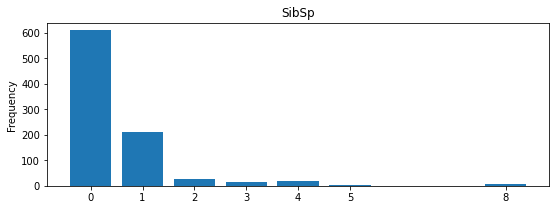

SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


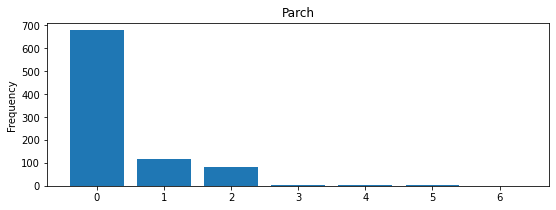

Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for cat in category:
    ploting(cat)

In [11]:
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

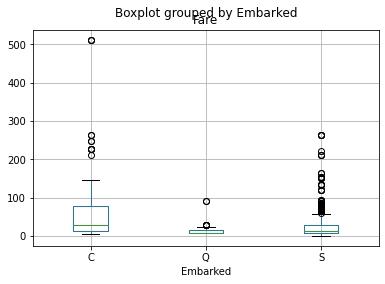

In [12]:
data_train.boxplot(column= 'Fare',by = 'Embarked')

In [13]:
#Filling null value for the 'Embarked column'
data_train['Embarked'].fillna('C', inplace= True)
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
#To find the outliers using IQR
from collections import Counter
def detect_outliers(df ,features):
    outliers = []
    
    for x in features:
        #calculating q1 and q3
        q1 = np.percentile(df[x],25)
        q3 = np.percentile(df[x],75)
        iqr = q3-q1
        #this is the step of outlier 
        outlier_step = iqr * 1.5
        #storing the indices of the outliers
        outliers.extend(df[(df[x]< q1 - outlier_step )| (df[x] > q3 +outlier_step)].index)
        
        
        
    outliers = Counter(outliers)
  
    multiple_outliers = list(i for i, v in outliers.items() if v > 2)
    print(multiple_outliers)
    
    return multiple_outliers
        
    

In [15]:
data_train.loc[detect_outliers(data_train,["Age", "SibSp", "Parch", "Fare"])]

[7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C


In [16]:
#droping the outliers of the data set 
data_train = data_train.drop(detect_outliers(data_train,["Age", "SibSp", "Parch", "Fare"]), axis =0).reset_index( 
    drop =True)

[7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [17]:
len(data_train)

866

In [18]:
#Ploting the a sns 
def factorploting(df, features):
    for x in features:
        g = sns.factorplot(x = x, y = 'Survived', data = df, kind = 'bar', size = 12 )
        g.set_ylabels('Survived Probability')
        plt.show()
        


/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


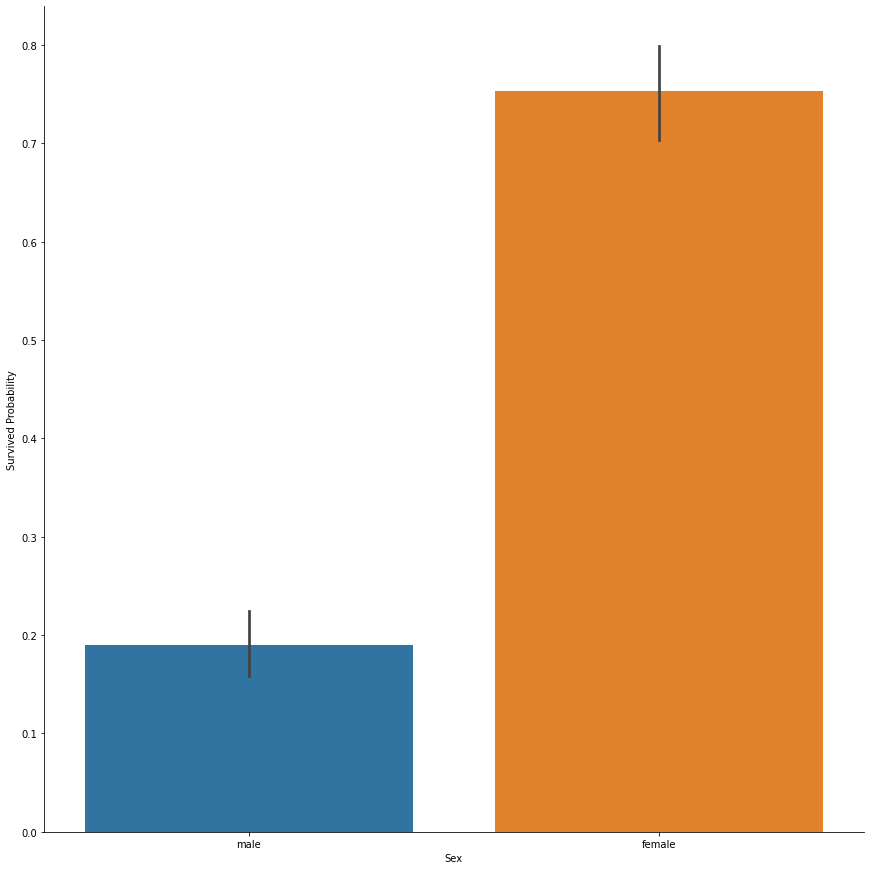

/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


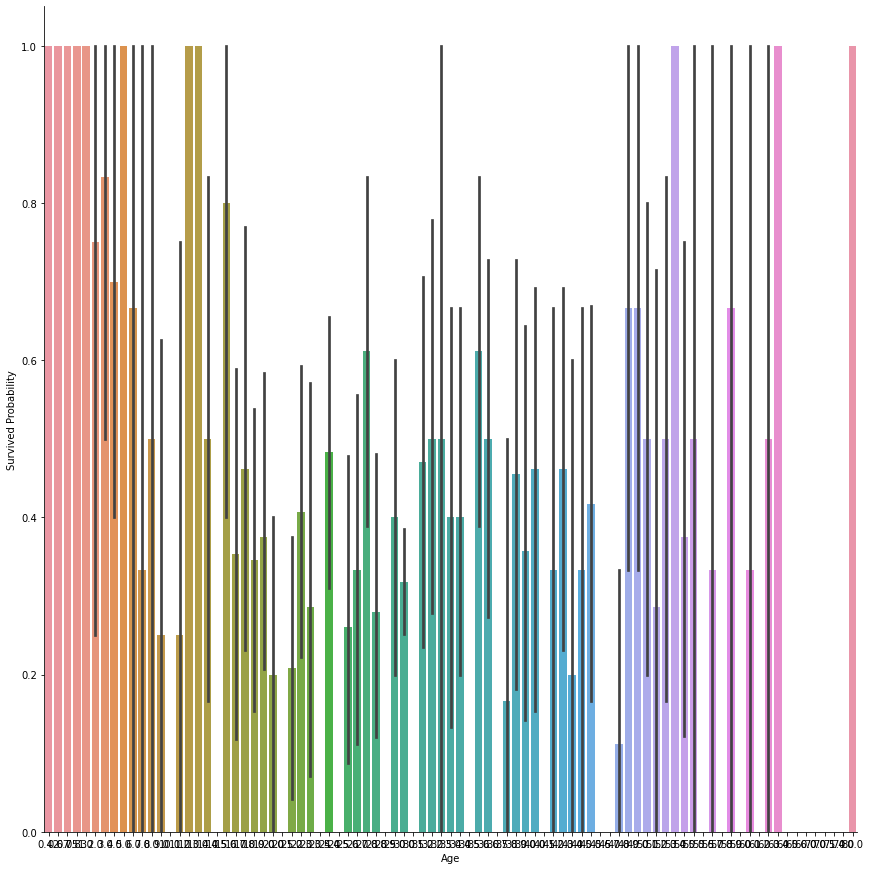

/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


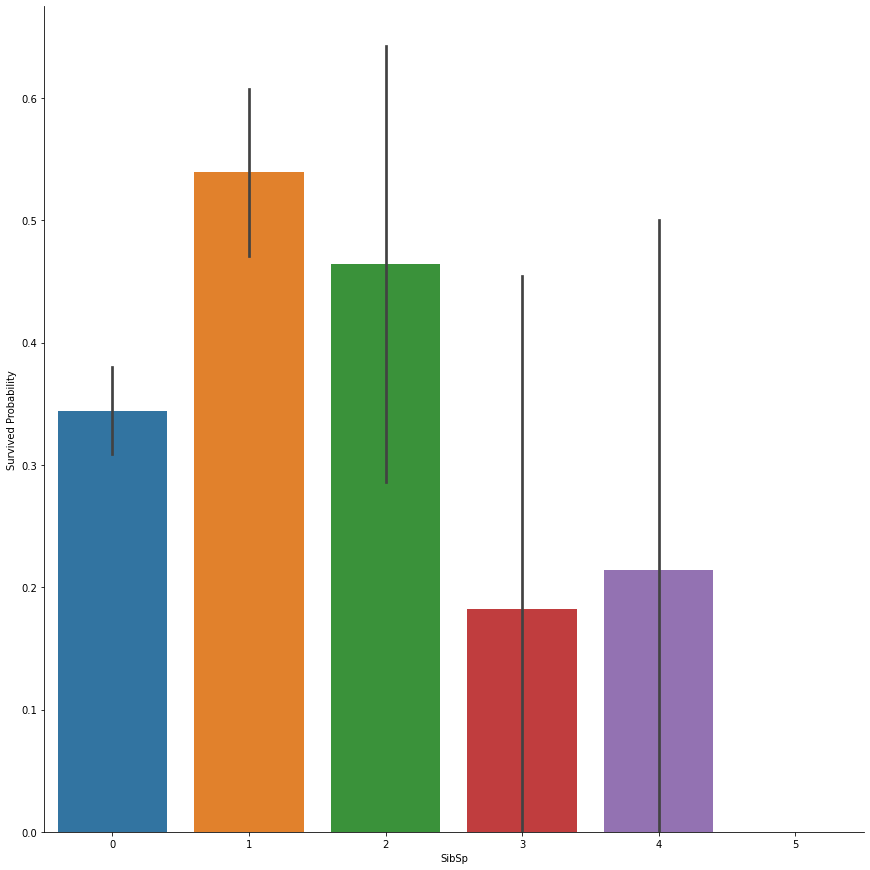

/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


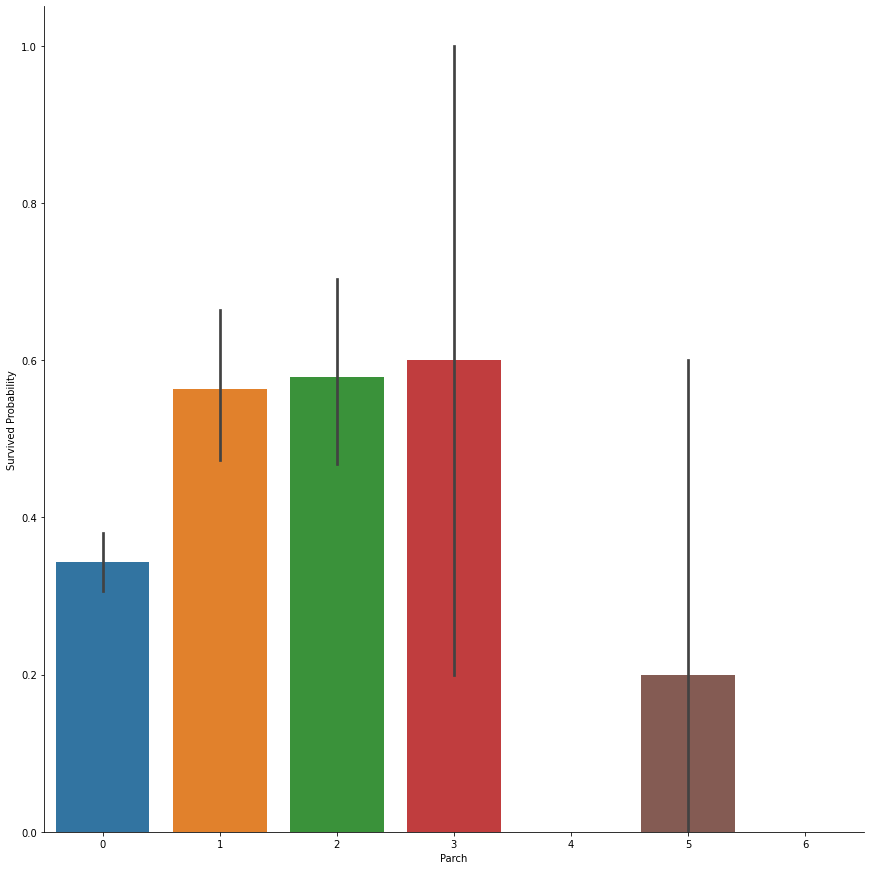

/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anmol/.local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


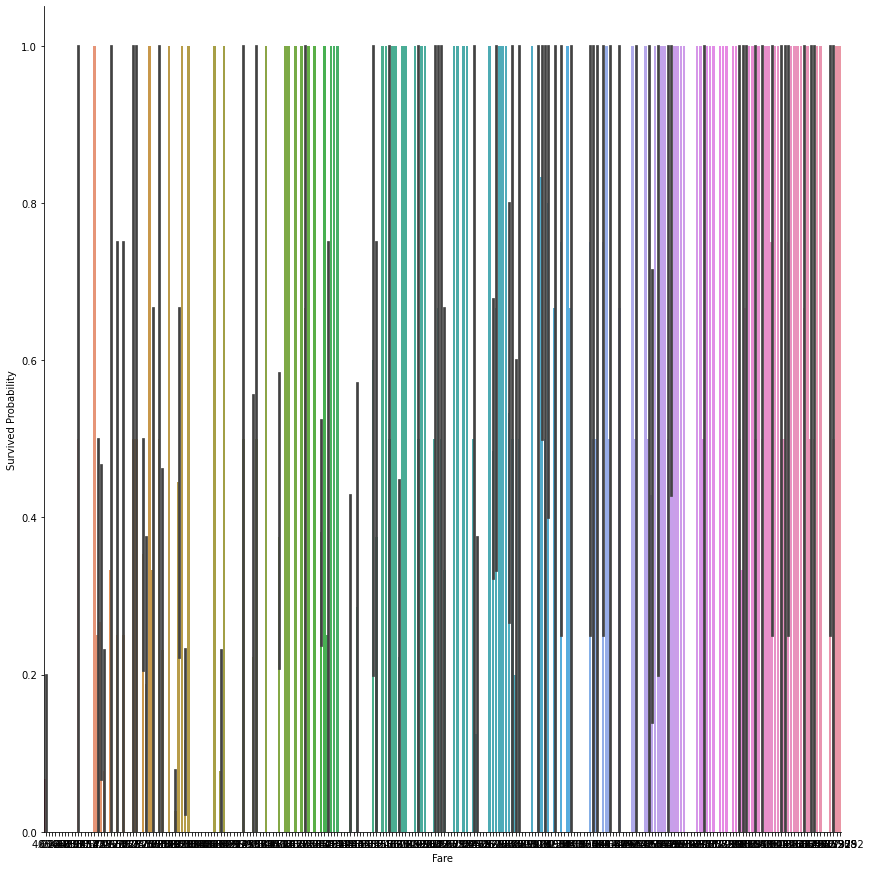

In [19]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
factorploting(data_train, features)

## The regression models

In [35]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelEncoder  = LabelEncoder()
data_train['Sex'] = LabelEncoder().fit_transform(data_train['Sex'])   
data_test['Sex'] = LabelEncoder().fit_transform(data_test['Sex'])  

data_train.Age = data_train.Age.fillna(data_train.Age.median())
data_test.Age = data_test.Age.fillna(data_test.Age.median())
data_test.Fare = data_test.Fare.fillna(data_test.Fare.median())

In [36]:
from sklearn.linear_model import LogisticRegression

X = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_train[['Survived']]
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [44]:
model = LogisticRegression(max_iter = 10000)
model.fit(X,y)

/home/anmol/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=10000)

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X, y,cv=5)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7877095  0.7752809  0.78089888 0.75842697 0.82022472]
Mean: 0.7845081915761722
Standard Deviation: 0.020319050642552603


/home/anmol/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/anmol/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/anmol/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/anmol/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [52]:
preds = model.predict(data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [53]:
passIDs = data_test[["PassengerId"]].values

In [60]:
df_for_submission = {'PassengerId': passIDs.ravel(), 'Survived': preds}
df_submission_predictions = pd.DataFrame(df_for_submission).set_index(['PassengerId'])
df_submission_predictions.head(10)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [55]:
df_submission_predictions.to_csv('Anmol_kaggle_1.csv')

In [62]:
pd.read_csv('Anmol_kaggle_1.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
